# Normal shocks
In the last notebook, we saw that normal shocks develop in a nozzle when it is
not perfectly expanded. This notebook demonstrates the use of the compressible tools
for dealing with **normal shock waves**.

### Set up the module

In [1]:
using Gasdynamics1D

In [2]:
using Plots

### General use of normal shock relations
Normal shock relations are designated with the argument `NormalShock`. For example,
let's look at the ratio of stagnation pressures $p_{02}/p_{01}$ across a normal shock
 with the Mach number $M_1$ entering the shock equal to 2:

In [3]:
p02_over_p01 = StagnationPressureRatio(MachNumber(2),NormalShock)

StagnationPressureRatio = 0.7208738614847454

and the density $\rho_2/\rho_1$ increases by the factor:

In [4]:
ρ2_over_ρ1 = DensityRatio(MachNumber(2),NormalShock)

DensityRatio = 2.666666666666667

What is the entropy change across this shock?

In [5]:
s2_minus_s1 = Entropy(Entropy(0),MachNumber(2),NormalShock)

Entropy = 93.93254753669774 J kg⁻¹ K⁻¹

Let's plot the entropy increase as a function of Mach number:

In [6]:
M1 = range(1,3,length=101)
s2 = []
pratio = []
for M in M1
    push!(s2,ustrip(Entropy(Entropy(0),MachNumber(M),NormalShock)))
    push!(pratio,ustrip(PressureRatio(MachNumber(M),NormalShock)))
end

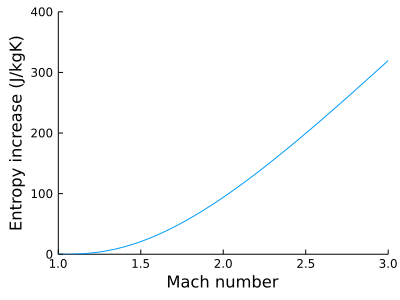

In [7]:
plot(M1,s2,xlim=(1,3),ylim=(0,400),xlabel="Mach number",ylabel="Entropy increase (J/kgK)")

Not surprisingly, the entropy jump gets bigger as the Mach number increases

### Example 1
For air entering a shock at Mach number 3, 1 atm, and 50 degrees F, what are the
Mach number, pressure, and temperature on the other side of the shock?

In [8]:
p1 = Pressure(1u"atm")
M1 = MachNumber(3)
T1 = Temperature(50u"°F")

Temperature = 283.15 K

The Mach number exiting the shock is

In [9]:
M2 = MachNumber(M1,NormalShock)

MachNumber = 0.4751909633114914

Pressure exiting the shock (in atm) is

In [10]:
p2 = Pressure(p1*PressureRatio(M1,NormalShock))
value(p2,u"atm")

10.333333333333334 atm

and the temperature exiting the shock (in F) is

In [11]:
T2 = Temperature(T1*TemperatureRatio(M1,NormalShock))
value(T2,u"°F")

905.7422222222217 °F

### Example 2
A blow-down supersonic windtunnel is supplied with air from a large reservoir.
A Pitot tube is placed at the exit plane of a converging-diverging nozzle. The test
section lies at the end of the diverging section. The Mach number in the test
section (M2) is 2 and the pressure is below atmospheric, so a shock is formed at
the exit. The pressure just after the shock (p3) is 14.7 psi. Find the pressure in
the reservoir (p01), the pressure in the throat (pth), the Mach number just after
the shock (M3), the pressure at the Pitot tube (p4), and the temperature at the Pitot
 tube (T4).

In [12]:
M2 = MachNumber(2)
p3 = Pressure(14.7u"psi")

Pressure = 101352.9322095749 Pa

First, let's find the pressure just before the shock and the Mach number
just after the shock
p3/p2

In [13]:
p3_over_p2 = PressureRatio(M2,NormalShock)

PressureRatio = 4.5

p03/p02

In [14]:
p03_over_p02 = StagnationPressureRatio(M2,NormalShock)

StagnationPressureRatio = 0.7208738614847454

M3

In [15]:
M3 = MachNumber(M2,NormalShock)

MachNumber = 0.5773502691896257

We can now calculate the pressure just before the shock, using $p_2 = p_3/(p_3/p_2)$

In [16]:
p2 = Pressure(p3/p3_over_p2)

Pressure = 22522.873824349976 Pa

Now, let's find the conditions in the throat and reservoir, based on what we have
 been given here. We can immediately find the stagnation pressure upstream of the
 shock using the isentropic relation. This stagnation pressure is the same as the
 reservoir pressure.

In [17]:
p02 = StagnationPressure(p2,M2,Isentropic)
p01 = p02

StagnationPressure = 176229.0790781043 Pa

We know that the throat is choked. It must be, because the flow is subsonic before
and supersonic after the throat. Therefore, $M_{th}$ is 1, and we can get the local
pressure ($p_{th}$) from knowing the stagnation pressure and Mach number there:

In [18]:
Mth = MachNumber(1)
p0th = p02
pth = Pressure(p0th,Mth,Isentropic)

Pressure = 93098.61294313218 Pa

Now we can calculate the conditions at the Pitot tube at the exit. At the nose of
the Pitot tube, the flow stagnates. Thus, the pressure and temperature are equal
to the stagnation values. The stagnation pressure at the exit is the same as the
stagnation pressure at point 3 (just after the shock):

In [19]:
p03 = Pressure(p03_over_p02*p02)

Pressure = 127038.9367409336 Pa

In [20]:
value(p03,u"psi")

18.425439988556167 psi

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*